In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [100]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
df.shape

(891, 12)

In [102]:
df= df.drop_duplicates()

In [103]:
df.shape

(891, 12)

In [104]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
# we have to remove the null values and we can see there are some unwanted columns too

In [107]:
#dropping the column Name and Ticket because these are completely irrelevant to our prediction or target.
#dropping the column Cabin because it has more of null values and the cabin can be found from the fare rate and pclass

df.drop("Name",axis = 1,inplace = True)
df.drop("Cabin",axis=1, inplace = True)
df.drop("Ticket",axis=1, inplace = True)

In [108]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [109]:
#fill up or replace the null
df["Age"].replace(np.nan, df["Age"].mean(), inplace = True)
df["Embarked"].replace(np.nan, df["Embarked"].mode()[0], inplace = True)

In [110]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [111]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [112]:
# there are no null values, now we are good to go!

In [113]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [114]:
# there are 2 objext type features, let's see whether these two columns are related to the target or we can drop them.

In [115]:
# Visualization of Sex to the Survival count

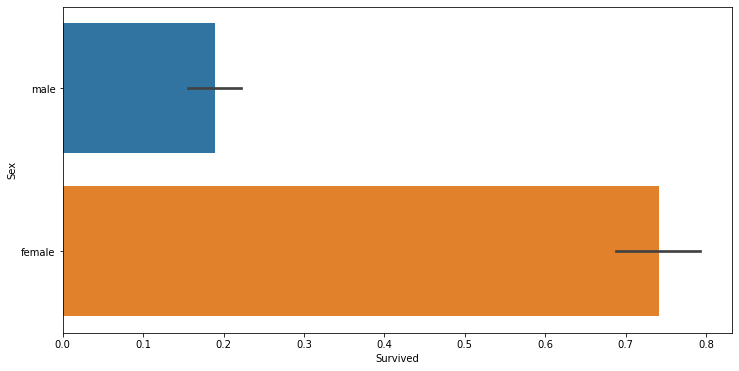

In [116]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'Survived',y= 'Sex', data= df)
plt.show()

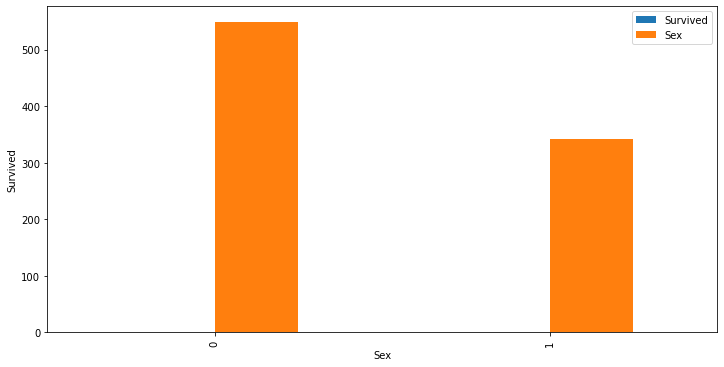

In [117]:
dd = df[["Sex","Survived"]].groupby(["Survived"], as_index = False).count()
dd.plot(kind = "bar",figsize = (12,6))
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.show()

In [118]:
# Visualization of Embarked to the Survival count

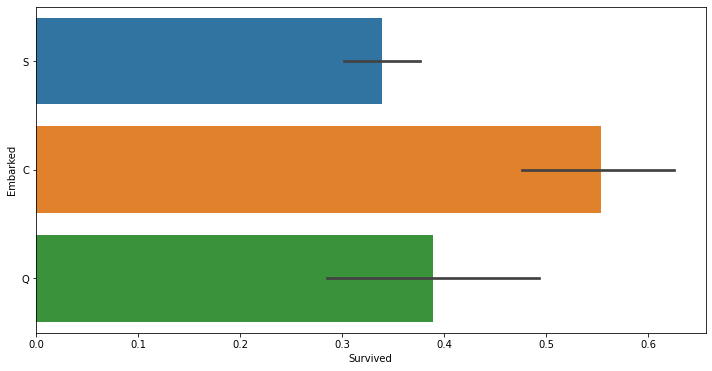

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'Survived',y= 'Embarked', data= df)
plt.show()

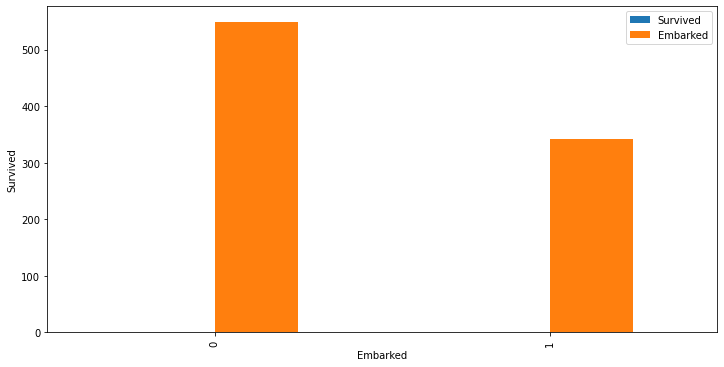

In [120]:
dd = df[["Embarked","Survived"]].groupby(["Survived"], as_index = False).count()
dd.plot(kind = "bar",figsize = (12,6))
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.show()

In [121]:
# we can see from above both are highly related to our target, so we can not drop them


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

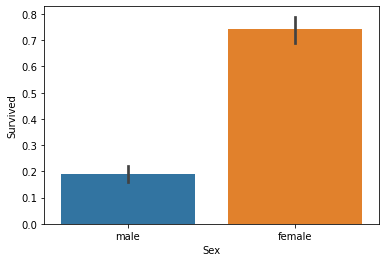

In [122]:
#EDA
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='PassengerId', ylabel='Count'>

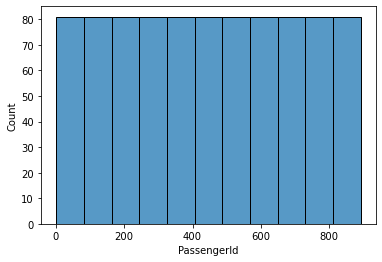

In [123]:
sns.histplot(x='PassengerId',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

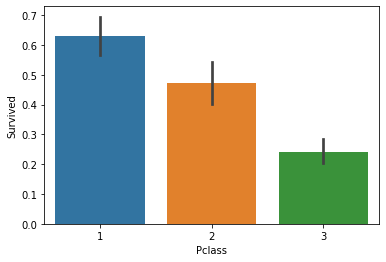

In [124]:
sns.barplot(x='Pclass', y='Survived', data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

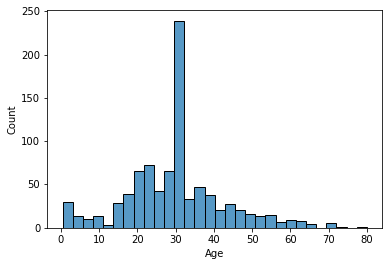

In [125]:
sns.histplot(x='Age', data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

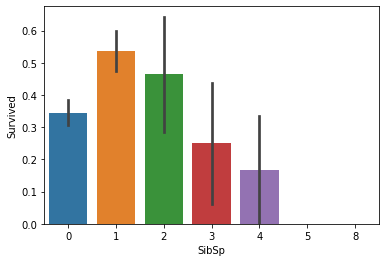

In [126]:
sns.barplot(x='SibSp', y='Survived', data=df)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

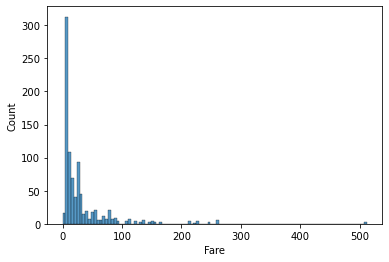

In [127]:
sns.histplot(x='Fare',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

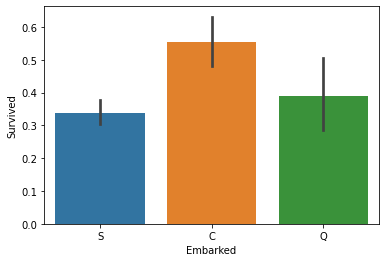

In [128]:
sns.barplot(x='Embarked', y='Survived', data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

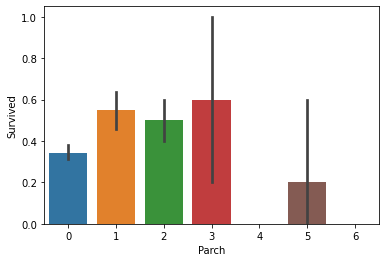

In [129]:
sns.barplot(x='Parch', y='Survived', data=df)

In [130]:
# let's encode these object type columns
df = pd.get_dummies(df, prefix = ["Sex","Embarked"])

In [131]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [132]:
#let us make a heatmap

<AxesSubplot:>

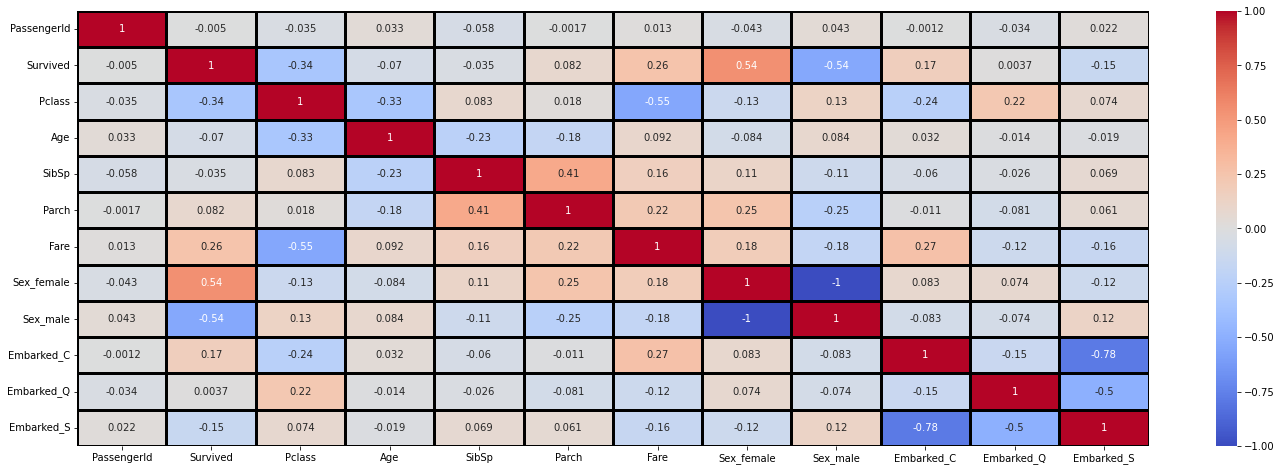

In [133]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [134]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [135]:
#modelling and train and test split

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
lr= LogisticRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
svc= SVC()

In [137]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [138]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0


In [139]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [140]:
from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()

X = scale.fit_transform(X)
X

array([[-1.73010796,  0.82737724, -0.5924806 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [-1.72622007, -1.56610693,  0.63878901, ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [-1.72233219,  0.82737724, -0.2846632 , ..., -0.48204268,
        -0.30756234,  0.61583843],
       ...,
       [ 1.72233219,  0.82737724,  0.        , ..., -0.48204268,
        -0.30756234,  0.61583843],
       [ 1.72622007, -1.56610693, -0.2846632 , ...,  2.0745051 ,
        -0.30756234, -1.62380254],
       [ 1.73010796,  0.82737724,  0.17706291, ..., -0.48204268,
         3.25137334, -1.62380254]])

In [141]:
#best random state for logistic regression.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    lr= LogisticRegression()
    lr.fit(X_train, y_train)
    prediction= lr.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7932960893854749 random_state 1
max_accuracy 0.7932960893854749 max_random_state 1
accuracy 0.7821229050279329 random_state 2
accuracy 0.7597765363128491 random_state 3
accuracy 0.8268156424581006 random_state 4
max_accuracy 0.8268156424581006 max_random_state 4
accuracy 0.8156424581005587 random_state 5
accuracy 0.8547486033519553 random_state 6
max_accuracy 0.8547486033519553 max_random_state 6
accuracy 0.7597765363128491 random_state 7
accuracy 0.7597765363128491 random_state 8
accuracy 0.770949720670391 random_state 9
accuracy 0.8212290502793296 random_state 10
accuracy 0.8547486033519553 random_state 11
accuracy 0.7932960893854749 random_state 12
accuracy 0.8379888268156425 random_state 13
accuracy 0.8044692737430168 random_state 14
accuracy 0.8044692737430168 random_state 15
accuracy 0.7430167597765364 random_state 16
accuracy 0.776536312849162 random_state 17
accuracy 0.8547486033519553 random_state 18
accuracy 0.8324022346368715 random_state 19
accuracy 0.81564245810

In [142]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8547486033519553 on random_state 6


In [143]:
#best random state for Decision Tree.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    dt= DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    prediction= dt.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7597765363128491 random_state 1
max_accuracy 0.7597765363128491 max_random_state 1
accuracy 0.7597765363128491 random_state 2
accuracy 0.7318435754189944 random_state 3
accuracy 0.7821229050279329 random_state 4
max_accuracy 0.7821229050279329 max_random_state 4
accuracy 0.7541899441340782 random_state 5
accuracy 0.7821229050279329 random_state 6
accuracy 0.7150837988826816 random_state 7
accuracy 0.7318435754189944 random_state 8
accuracy 0.7541899441340782 random_state 9
accuracy 0.776536312849162 random_state 10
accuracy 0.7430167597765364 random_state 11
accuracy 0.6983240223463687 random_state 12
accuracy 0.7653631284916201 random_state 13
accuracy 0.770949720670391 random_state 14
accuracy 0.7932960893854749 random_state 15
max_accuracy 0.7932960893854749 max_random_state 15
accuracy 0.7094972067039106 random_state 16
accuracy 0.7486033519553073 random_state 17
accuracy 0.7932960893854749 random_state 18
accuracy 0.7094972067039106 random_state 19
accuracy 0.7430167597

In [144]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8212290502793296 on random_state 45


In [145]:
#best random state for Random Forest.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    rf= RandomForestClassifier()
    rf.fit(X_train, y_train)
    prediction= rf.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.7932960893854749 random_state 1
max_accuracy 0.7932960893854749 max_random_state 1
accuracy 0.7821229050279329 random_state 2
accuracy 0.8156424581005587 random_state 3
max_accuracy 0.8156424581005587 max_random_state 3
accuracy 0.8547486033519553 random_state 4
max_accuracy 0.8547486033519553 max_random_state 4
accuracy 0.8324022346368715 random_state 5
accuracy 0.8491620111731844 random_state 6
accuracy 0.7653631284916201 random_state 7
accuracy 0.7877094972067039 random_state 8
accuracy 0.7821229050279329 random_state 9
accuracy 0.8659217877094972 random_state 10
max_accuracy 0.8659217877094972 max_random_state 10
accuracy 0.8268156424581006 random_state 11
accuracy 0.7486033519553073 random_state 12
accuracy 0.8324022346368715 random_state 13
accuracy 0.8212290502793296 random_state 14
accuracy 0.8044692737430168 random_state 15
accuracy 0.770949720670391 random_state 16
accuracy 0.7877094972067039 random_state 17
accuracy 0.8603351955307262 random_state 18
accuracy 0.84

In [146]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.888268156424581 on random_state 160


In [147]:
#best random state for SVC.
maxAccu= 0
maxRS= 0

for i in range(1,200):
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= .20, random_state= i)
    svc= SVC()
    svc.fit(X_train, y_train)
    prediction= svc.predict(X_test)
    acc= accuracy_score(y_test, prediction)
    print('accuracy', acc, 'random_state', i)
    
    if acc> maxAccu:
        maxAccu=acc
        maxRS= i
        print('max_accuracy', maxAccu, 'max_random_state', i)

accuracy 0.770949720670391 random_state 1
max_accuracy 0.770949720670391 max_random_state 1
accuracy 0.776536312849162 random_state 2
max_accuracy 0.776536312849162 max_random_state 2
accuracy 0.7932960893854749 random_state 3
max_accuracy 0.7932960893854749 max_random_state 3
accuracy 0.8379888268156425 random_state 4
max_accuracy 0.8379888268156425 max_random_state 4
accuracy 0.8379888268156425 random_state 5
accuracy 0.8603351955307262 random_state 6
max_accuracy 0.8603351955307262 max_random_state 6
accuracy 0.7597765363128491 random_state 7
accuracy 0.7653631284916201 random_state 8
accuracy 0.7541899441340782 random_state 9
accuracy 0.8324022346368715 random_state 10
accuracy 0.8770949720670391 random_state 11
max_accuracy 0.8770949720670391 max_random_state 11
accuracy 0.7653631284916201 random_state 12
accuracy 0.8379888268156425 random_state 13
accuracy 0.8379888268156425 random_state 14
accuracy 0.8212290502793296 random_state 15
accuracy 0.7932960893854749 random_state 16
ac

In [148]:
print('best accuracy is', maxAccu, 'on random_state', maxRS)

best accuracy is 0.8770949720670391 on random_state 11


In [149]:
#Logistic regression

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)

lr.fit(X_train, y_train)
prediction= lr.predict(X_test)
accuracy_score(y_test, prediction)

0.8547486033519553

In [150]:
#Decision tree

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

dt.fit(X_train, y_train)
prediction= dt.predict(X_test)
accuracy_score(y_test, prediction)

0.8324022346368715

In [151]:
#Random Forest

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 160)

rf.fit(X_train, y_train)
prediction= rf.predict(X_test)
accuracy_score(y_test, prediction)

0.8659217877094972

In [152]:
#SVC

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

svc.fit(X_train, y_train)
prediction= svc.predict(X_test)
accuracy_score(y_test, prediction)

0.8770949720670391

In [153]:
# AUC and ROC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

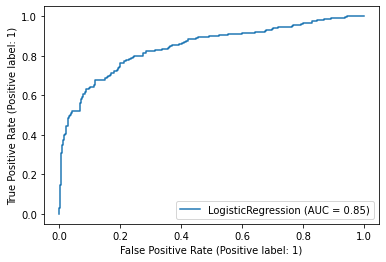

In [154]:
disp= plot_roc_curve(lr, X_train, y_train)

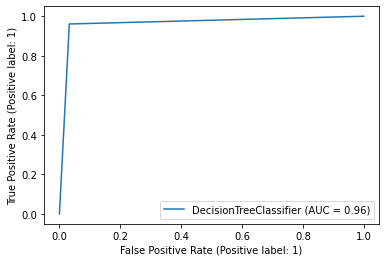

In [155]:
disp= plot_roc_curve(dt, X_train, y_train)

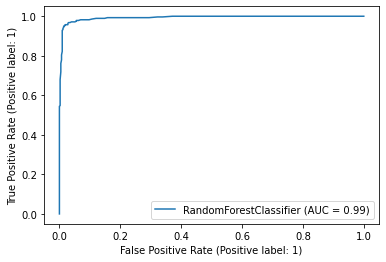

In [156]:
disp= plot_roc_curve(rf, X_train, y_train)

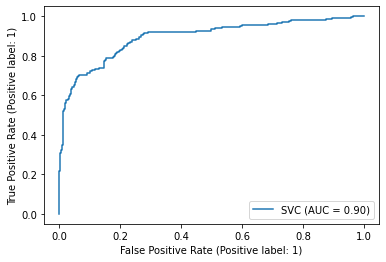

In [157]:
disp= plot_roc_curve(svc, X_train, y_train)

In [158]:
#Random forest has highest AUC value, so let us proceed with this model

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 160)

rf.fit(X_train, y_train)
prediction= dt.predict(X_test)
accuracy_score(y_test, prediction)

0.9720670391061452

In [160]:
print(confusion_matrix(y_test,prediction))

[[118   5]
 [  0  56]]


In [161]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       123
           1       0.92      1.00      0.96        56

    accuracy                           0.97       179
   macro avg       0.96      0.98      0.97       179
weighted avg       0.97      0.97      0.97       179



In [162]:
# check train and test score
y_pred= rf.predict(X_train)
pred= rf.predict(X_test)
train_result= accuracy_score(y_train, y_pred)*100
test_result= accuracy_score(y_test, pred)*100

In [163]:
train_result

100.0

In [164]:
test_result

87.70949720670392

In [165]:
#cross-validation of Random forest

train_accuracy=  accuracy_score(y_train, y_pred)
test_accuracy= accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score= cross_val_score(rf,X, y, cv=j)
    cv_mean= cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for test is {test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.6051594699450799 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 3 the cv score is 0.8159371492704826 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 4 the cv score is 0.8114723467862482 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 5 the cv score is 0.8115184232000502 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 6 the cv score is 0.8249138400145112 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 7 the cv score is 0.8182473284589425 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 8 the cv score is 0.8250180984555985 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cro

In [166]:
#cross-validation of Logistic Regression

train_accuracy=  accuracy_score(y_train, y_pred)
test_accuracy= accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score= cross_val_score(lr,X, y, cv=j)
    cv_mean= cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for test is {test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.7755479417544213 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 3 the cv score is 0.787878787878788 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 4 the cv score is 0.7901415989981012 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 5 the cv score is 0.783390873140418 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 6 the cv score is 0.7946218030110647 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 7 the cv score is 0.7912594910011249 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 8 the cv score is 0.7946126930501931 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross

In [167]:
#cross-validation of Decision tree

train_accuracy=  accuracy_score(y_train, y_pred)
test_accuracy= accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score= cross_val_score(dt,X, y, cv=j)
    cv_mean= cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for test is {test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.570335567088225 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 3 the cv score is 0.6498316498316499 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 4 the cv score is 0.7217609986668283 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 5 the cv score is 0.7621994852802711 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 6 the cv score is 0.7386480440171715 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 7 the cv score is 0.7665828880764904 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 8 the cv score is 0.6653897200772201 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cros

In [168]:
#cross-validation of SVC

train_accuracy=  accuracy_score(y_train, y_pred)
test_accuracy= accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
for j in range (2,10):
    cv_score= cross_val_score(svc,X, y, cv=j)
    cv_mean= cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for test is {test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.795752506676072 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 3 the cv score is 0.8249158249158249 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 4 the cv score is 0.8193198804185351 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 5 the cv score is 0.8237963718536188 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 6 the cv score is 0.8305293548582141 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 7 the cv score is 0.8238188976377953 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross fold 8 the cv score is 0.820443211068211 and accuracy score for training is 1.0 and accuracy score for test is 0.8770949720670391


At cross

In [169]:
#from above let us choose cv= 6

In [170]:
# Cross Validation of Logistic Reg.
lrscore= cross_val_score(lr, X, y, cv=6)
lrc= lrscore.mean()
print('Cross Val Score:', lrc*100)

Cross Val Score: 79.46218030110647


In [171]:
# Cross Validation of Decision Tree.
dtscore= cross_val_score(dt, X, y, cv=7)
dtc= dtscore.mean()
print('Cross Val Score:', dtc*100)

Cross Val Score: 77.10823256467941


In [172]:
# Cross Validation of Random Forest.
rfscore= cross_val_score(rf, X, y, cv=6)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

Cross Val Score: 82.04168934034706


In [173]:
# Cross Validation of SVC.
svcscore= cross_val_score(svc, X, y, cv=6)
svcc= svcscore.mean()
print('Cross Val Score:', svcc*100)

Cross Val Score: 83.05293548582141


In [174]:
#Logistic Reg.
accuracy_score(y_test, prediction)*100- lrc*100

17.74452360950805

In [175]:
#Decision tree
accuracy_score(y_test, dt.predict(X_test))*100- dtc*100

20.09847134593511

In [176]:
#Random forest.
accuracy_score(y_test, rf.predict(X_test))*100- rfc*100

5.667807866356853

In [177]:
#SVC.
accuracy_score(y_test, svc.predict(X_test))*100- svcc*100

6.332539374513786

In [178]:
# We can see here difference of accuracy and cross validation is least for Random forest. So, this is our best model.

In [179]:
#Hyperparameter tuning

In [180]:
from sklearn.model_selection import GridSearchCV
random_classifier = RandomForestClassifier()
parameters = {'n_estimators':[58],'min_samples_leaf': [5,10,15],'criterion':['entropy']}
random_grid = GridSearchCV(random_classifier, parameters)

In [181]:
random_grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [58]})

In [182]:
random_grid.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 10, 'n_estimators': 58}

In [183]:
random_grid.score(X_train,y_train)

0.8384831460674157

In [184]:
y_pred_train=random_grid.predict(X_train)
accuracy_score(y_train,y_pred_train)

0.8384831460674157

In [195]:
pred_decision=random_grid.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.8435754189944135

In [200]:
rfscore= cross_val_score(random_grid, X, y, cv=6)
rfc= rfscore.mean()
print('Cross Val Score:', rfc*100)

Cross Val Score: 81.47635890924482


In [201]:
# Difference of Cross-Validation and accuracy

accuracy_score(y_test, y_pred_test)*100- rfc*100

2.881182990196521

In [188]:
# Efficiency has been better!

In [189]:
import pickle
filename= 'churn.pkl'
pickle.dump(random_grid, open(filename, 'wb'))

In [190]:
[]

[]

In [191]:
#conclusion

In [192]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result= loaded_model.score(X_test, y_test)
print(result*100)

84.35754189944134


In [202]:
conclusion= pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]], index=['Predicted','Original'])

In [203]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
Predicted,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
